## <center> **The Street View House Numbers (SVHN) Dataset** </center>

### **Project description and overview:**

In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.

**Data Set:**<br>
● The name of the dataset is SVHN_single_grey1.h5<br>
● The data is a subset of the original dataset. Use this subset only for the project.<br>
● Keep a copy of your dataset in your own google drive.

**Project Objectives:**<br>
The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:

1. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
2. Data fetching and understand the train/val/test splits.
3. Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)
4. Print the classification metric report (2.5 points)
5. Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)
6. Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)
7. Implement batch normalization for training the neural network (2.5 points)
8. Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

In [1]:
tensorflow_version 2.x

TensorFlow 2.x selected.


**Import necessary libraries:**

In [2]:
import tensorflow as tf
print(tf.__version__)

import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import h5py

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

2.1.0-rc1


**Mount Drive:**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Load h5py file:**

In [0]:
data = h5py.File('/content/drive/My Drive/INNDL/SVHN_single_grey1.h5', 'r')

**View the keys:**

In [41]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

**Extract data using keys:**

In [0]:
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]
X_val_orig = data['X_val'][:]
y_val_orig = data['y_val'][:]

data.close()

**View shape of train, validation and test data:**

In [43]:
print('Training set    : ', X_train.shape, y_train.shape)
print('Validation set  : ', X_val_orig.shape, y_val_orig.shape)
print('Test set        : ', X_test.shape, y_test.shape)

Training set    :  (42000, 32, 32) (42000,)
Validation set  :  (60000, 32, 32) (60000,)
Test set        :  (18000, 32, 32) (18000,)


**View a single image:**

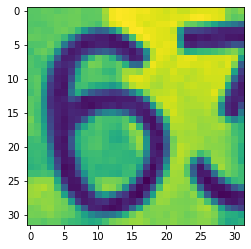

In [44]:
plt.imshow(X_train[1])

**View few images from the file:**

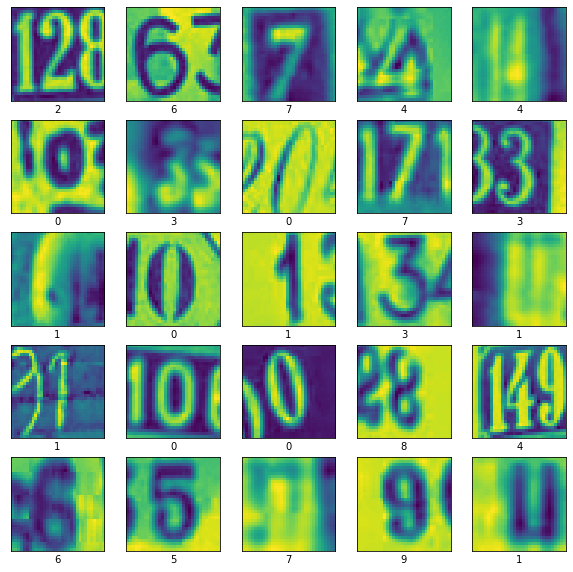

In [45]:
plt.figure(figsize=(10,10))
for img in range(25):
    plt.subplot(5, 5, img+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[img])
    plt.xlabel(y_train[img])
plt.show()


The validation data provided in the file has a total record count of 60000, which is the whole data itself. So I'm not using this and will be splitting the train data into train and validation set

**Split the data into train and validation sets:**

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=7)


**View number of labels in target:**

In [47]:
# Using Original validation set to get the exact data:
np.unique(y_val_orig)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Get the number of labels in target:**

In [48]:
num_classes = len(np.unique(y_val_orig))
num_classes

10

**Convert target to categorical:**

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

**Flatten images to one dimension:**

In [0]:
X_train_flt = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_val_flt = X_val.reshape(X_val.shape[0], X_val.shape[1] * X_val.shape[2])
X_test_flt = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [51]:
print(X_train_flt.shape)
print(X_val_flt.shape)
print(X_test_flt.shape)

(33600, 1024)
(8400, 1024)
(18000, 1024)


**Normalize data:**

In [0]:
X_train_flt = X_train_flt.astype('float32')
X_val_flt = X_val_flt.astype('float32')
X_test_flt = X_test_flt.astype('float32')

X_train_flt_norm = X_train_flt / 255.0
X_val_flt_norm = X_val_flt / 255.0
X_test_flt_norm = X_test_flt / 255.0

In [53]:
X_train_flt_norm

array([[0.41615844, 0.42007962, 0.43184316, ..., 0.52056235, 0.5138921 ,
        0.5134451 ],
       [0.20405255, 0.21585843, 0.21613647, ..., 0.48634195, 0.4824208 ,
        0.48355058],
       [0.6034247 , 0.59586036, 0.58526903, ..., 0.6162761 , 0.62456554,
        0.6354349 ],
       ...,
       [0.55613804, 0.5439698 , 0.51769376, ..., 0.60285413, 0.6051561 ,
        0.6086302 ],
       [0.3375702 , 0.34149137, 0.36501843, ..., 0.57843685, 0.58005613,
        0.58005613],
       [0.730349  , 0.73819137, 0.73819137, ..., 0.46024588, 0.489549  ,
        0.4504039 ]], dtype=float32)

## **k-Nearest Neighbor (kNN):**

**Extract a subset:**

Extract a data subset to find the optimal value of k, since it might end up into memory issue if tried on the entire data.

In [0]:
X_train_flt_norm_ss = X_train_flt_norm[:6000, :] # take first 6000 for validation
y_train_ss = y_train[:6000]

**Get maximum value of k:**

In [0]:
maxK = int(np.sqrt(X_train_flt_norm_ss.shape[0]))
maxK

77

**Finding optimal value of k:**

In [0]:
optimalK = 0
optimalTrainAccuracy = 0

In [0]:
KNN_score_df = pd.DataFrame(columns=('kval','score'))
for k in range(maxK):
    if(((k % 2) != 0) & (k > 1)):
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN.fit(X_train_flt_norm_ss, y_train_ss)
        KNN_score = KNN.score(X_train_flt_norm_ss, y_train_ss)
        KNN_score_df = KNN_score_df.append({'kval': k, 'score': KNN_score}, ignore_index=True)
        if(KNN_score > optimalTrainAccuracy):
            optimalK = k
            optimalTrainAccuracy = KNN_score

print('\n\033[1mOptimum value of K: \033[0m', optimalK)
print('\n\033[1mOptimal Train Accuracy: \033[0m', optimalTrainAccuracy,'\n')


Optimum value of K:  3

Optimal Train Accuracy:  0.4841666666666667 



**Let's plot k and scores:**

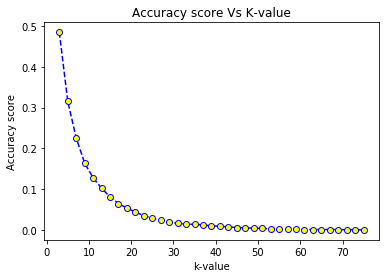

In [0]:
plt.plot(KNN_score_df['kval'], KNN_score_df['score'],color='blue',linestyle='dashed',marker='o',markerfacecolor = 'yellow')
plt.xlabel('k-value')
plt.ylabel('Accuracy score')
plt.title('Accuracy score Vs K-value')
# plt.yticks(np.arange(0.8, 1, 0.02))
# plt.xticks(np.arange(3, 14, 2))
plt.show()

**As seen, optimal value of k is found to be 3. We will proceed with the same for model building**

### **Call Nearest Neighbour algorithm**

In [54]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_flt_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### **On Validation data:**

**Prediction & Accuracy:**

In [55]:
y_predict_val = knn_model.predict(X_val_flt_norm) # For every validation data point, predict it's outcome
knn_val_acc = metrics.accuracy_score(y_val, y_predict_val) # get the accuracy score
knn_val_acc

0.3616666666666667

**Confusion matrix:**

In [56]:
knn_val_cm = confusion_matrix(y_val.argmax(axis=1), y_predict_val.argmax(axis=1))
print('Confusion matrix: \n', knn_val_cm)

Confusion matrix: 
 [[653  11   4   9   9   8  34   1  31  39]
 [304 417   9  14  25  11  14  13  11   8]
 [360  39 331  30  16  16   5  42  11  17]
 [404  49  26 240  13  43  12  19  24  20]
 [286  59   9  13 396   6  19   8  12  15]
 [445  24   6  51   7 199  30   8  28  27]
 [440  15   6   7  30  37 248   6  60   8]
 [283  60  40  16   9   5   7 402   9  11]
 [468  14   8  11  10  20  63   3 211  30]
 [458  25  12  13  15  21  16   8  33 272]]


**Plotting Confusion matrix:**

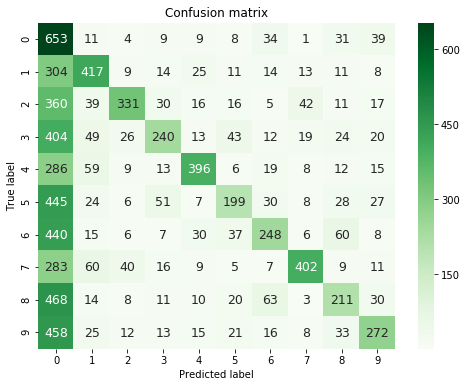

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(knn_val_cm), annot=True, annot_kws={"fontsize":12.5}, cmap='Greens', fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Classification Report:**

In [58]:
print(classification_report(y_val.argmax(axis=1), y_predict_val.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.16      0.82      0.27       799
           1       0.58      0.50      0.54       826
           2       0.73      0.38      0.50       867
           3       0.59      0.28      0.38       850
           4       0.75      0.48      0.59       823
           5       0.54      0.24      0.33       825
           6       0.55      0.29      0.38       857
           7       0.79      0.48      0.59       842
           8       0.49      0.25      0.33       838
           9       0.61      0.31      0.41       873

    accuracy                           0.40      8400
   macro avg       0.58      0.40      0.43      8400
weighted avg       0.58      0.40      0.43      8400



### **On Test data:**

**Prediction & Accuracy:**

In [60]:
y_predict_test = knn_model.predict(X_test_flt_norm) # For every test data point, predict it's outcome
knn_test_acc = metrics.accuracy_score(y_test, y_predict_test) # get the accuracy score
knn_test_acc

0.36088888888888887

**Confusion matrix:**

In [61]:
knn_test_cm = confusion_matrix(y_test.argmax(axis=1), y_predict_test.argmax(axis=1))
print('Confusion matrix: \n', knn_test_cm)

Confusion matrix: 
 [[1478   15    9   22   31   18   70   18   70   83]
 [ 684  917   40   34   51   20   20   38   13   11]
 [ 780   74  668   55   24   20   16   96   30   40]
 [ 851   91   44  459   24   94   27   29   63   37]
 [ 650  112   10   22  885   22   45   13   28   25]
 [ 919   48   20  110   15  439   85   14   69   49]
 [ 967   32    9   31   61   57  486    6  156   27]
 [ 582  112   66   36   10   12   15  933   11   31]
 [1023   32   11   45   37   55  110    7  434   58]
 [ 984   43   15   39   23   40   42   28   73  517]]


**Plotting Confusion matrix:**

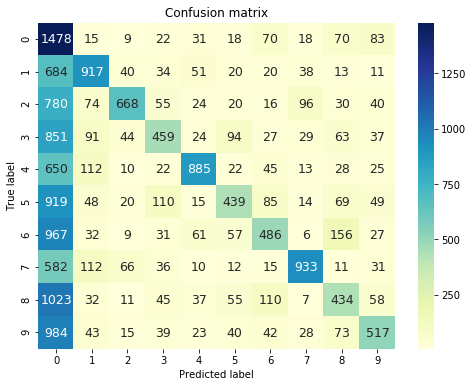

In [62]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(knn_test_cm), annot=True, annot_kws={"fontsize":12.5}, cmap='YlGnBu', fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Classification Report:**

In [63]:
print(classification_report(y_test.argmax(axis=1), y_predict_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.17      0.81      0.28      1814
           1       0.62      0.50      0.56      1828
           2       0.75      0.37      0.50      1803
           3       0.54      0.27      0.36      1719
           4       0.76      0.49      0.60      1812
           5       0.56      0.25      0.34      1768
           6       0.53      0.27      0.35      1832
           7       0.79      0.52      0.62      1808
           8       0.46      0.24      0.31      1812
           9       0.59      0.29      0.39      1804

    accuracy                           0.40     18000
   macro avg       0.58      0.40      0.43     18000
weighted avg       0.58      0.40      0.43     18000



### **Create a new dataframe to store the accuracies of different models:**

In [0]:
acc_df = pd.DataFrame(columns=['val_acc', 'test_acc', 'comments'], 
                      index=['KNN', 'NN_model', 'NN_model1', 'NN_model2'])

In [65]:
acc_df

,val_acc,test_acc,comments
KNN,NaN,NaN,NaN
NN_model,NaN,NaN,NaN
NN_model1,NaN,NaN,NaN
NN_model2,NaN,NaN,NaN


**Store accuracies of kNN:**

In [0]:
acc_df.iloc[0,0] = round(knn_val_acc*100, 2)
acc_df.iloc[0,1] = round(knn_test_acc*100, 2)
acc_df.iloc[0,2] = 'Performance is poor'

## **kNN Inference:**

- kNN with optimal k of 3, gave the below accuracies in the validation and the test data:

> - Validation data - 36.17%
> - Test data - 36.09%

- As per the confusion matrix and classification report, kNN has wrongly predicted most of the numbers as 0.

- Overall performance is poor on image classification

**Pickle file to save data:**

In [0]:
import pickle
pickle_out = open("/content/drive/My Drive/CNN/plant-seedlings-classification/y_predict.pickle", "wb")
pickle.dump(y_predict, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/My Drive/CNN/plant-seedlings-classification/y_predict_val.pickle", "wb")
pickle.dump(y_predict_val, pickle_out)
pickle_out.close()

## **Neural Network:**

In [67]:
X_train[0].ndim

2

**Reshape data before model building:**

In [68]:
# input image dimensions
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.

X_train_reshp = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val_reshp = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_test_reshp = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# Input shape:
input_shape = (img_rows, img_cols, 1)

print(X_train_reshp.shape)
print(X_val_reshp.shape)
print(X_test_reshp.shape)

(33600, 32, 32, 1)
(8400, 32, 32, 1)
(18000, 32, 32, 1)


## **Model - Deep neural network classifier with ReLU activation:**

In [69]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((img_rows*img_cols,), input_shape=input_shape))

# Hidden Layers:
model.add(tf.keras.layers.Dense(200, activation="relu", name="Layer_1"))
model.add(tf.keras.layers.Dense(100, activation="relu", name="Layer_2"))

# Output layer:
model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

# Compile model:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Summary:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
Total params: 226,110
Trainable params: 226,110
Non-trainable params: 0
_________________________________________________________________


**Fit the model:**

In [70]:
model.fit(X_train_reshp, y_train, validation_data=(X_val_reshp, y_val), epochs=50,
          batch_size = 32)

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 5s 143us/sample - loss: 8.6588 - accuracy: 0.1124 - val_loss: 2.5712 - val_accuracy: 0.1098
Epoch 2/50
33600/33600 [==============================] - 4s 119us/sample - loss: 2.3356 - accuracy: 0.1776 - val_loss: 2.1697 - val_accuracy: 0.2520
Epoch 3/50
33600/33600 [==============================] - 4s 120us/sample - loss: 1.9405 - accuracy: 0.3250 - val_loss: 1.9825 - val_accuracy: 0.3221
Epoch 4/50
33600/33600 [==============================] - 4s 121us/sample - loss: 1.7360 - accuracy: 0.4212 - val_loss: 2.0105 - val_accuracy: 0.3568
Epoch 5/50
33600/33600 [==============================] - 4s 120us/sample - loss: 1.5951 - accuracy: 0.4846 - val_loss: 1.5226 - val_accuracy: 0.4938
Epoch 6/50
33600/33600 [==============================] - 4s 120us/sample - loss: 1.5842 - accuracy: 0.4924 - val_loss: 1.4756 - val_accuracy: 0.5168
Epoch 7/50
33600/33600 [===========================

**Accuracy & loss:**

In [71]:
model_loss, model_accuracy = model.evaluate(X_val_reshp, y_val)
print("Feedforward neural network, RELU activations: ",(model_accuracy*100))

8400/8400 [==============================] - 0s 46us/sample - loss: 1.2325 - accuracy: 0.6081
Feedforward neural network, RELU activations:  60.80952286720276


**Predict for validation data:**

In [0]:
y_pred_val_model = model.predict_classes(X_val_reshp)

**Build Confusion matrix:**

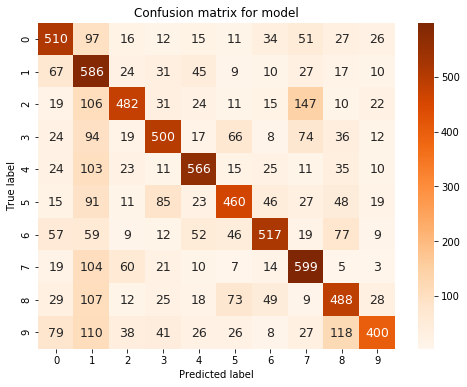

In [73]:
model_val_cm = confusion_matrix(y_val.argmax(axis=1), y_pred_val_model)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(model_val_cm), annot=True, annot_kws={"fontsize":12.5}, cmap='Oranges', fmt='d')
plt.title('Confusion matrix for model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Classification report:**

In [74]:
print(classification_report(y_val.argmax(axis=1), y_pred_val_model))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       799
           1       0.40      0.71      0.51       826
           2       0.69      0.56      0.62       867
           3       0.65      0.59      0.62       850
           4       0.71      0.69      0.70       823
           5       0.64      0.56      0.59       825
           6       0.71      0.60      0.65       857
           7       0.60      0.71      0.65       842
           8       0.57      0.58      0.57       838
           9       0.74      0.46      0.57       873

    accuracy                           0.61      8400
   macro avg       0.63      0.61      0.61      8400
weighted avg       0.63      0.61      0.61      8400



Model has wrongly predicted many numbers as 1. Let's try SGD optimizer

## **Model1 - Implement NN with (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions):**

In [75]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Reshape((img_rows*img_cols,),input_shape=input_shape))

# Hidden layers:
model1.add(tf.keras.layers.Dense(200, activation="relu", name='Layer_1'))
model1.add(tf.keras.layers.Dense(100, activation="relu", name='Layer_2'))

model1.add(tf.keras.layers.Dense(num_classes, activation="softmax", name='Output'))

#Compiling the Model
opt=tf.keras.optimizers.SGD(lr=0.001)

model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 226,110
Trainable params: 226,110
Non-trainable params: 0
_________________________________________________________________


**Fit the model:**

In [76]:
model1.fit(X_train_reshp, y_train, validation_data=(X_val_reshp, y_val), epochs=50,
          batch_size = 32)

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 4s 117us/sample - loss: 14.0853 - accuracy: 0.0999 - val_loss: 2.3051 - val_accuracy: 0.0982
Epoch 2/50
33600/33600 [==============================] - 4s 104us/sample - loss: 2.3030 - accuracy: 0.1008 - val_loss: 2.3044 - val_accuracy: 0.0982
Epoch 3/50
33600/33600 [==============================] - 3s 102us/sample - loss: 2.3026 - accuracy: 0.0982 - val_loss: 2.3054 - val_accuracy: 0.0982
Epoch 4/50
33600/33600 [==============================] - 4s 106us/sample - loss: 2.3025 - accuracy: 0.1013 - val_loss: 2.3046 - val_accuracy: 0.0982
Epoch 5/50
33600/33600 [==============================] - 4s 107us/sample - loss: 2.3025 - accuracy: 0.0999 - val_loss: 2.3047 - val_accuracy: 0.1012
Epoch 6/50
33600/33600 [==============================] - 4s 106us/sample - loss: 2.3025 - accuracy: 0.0995 - val_loss: 2.3045 - val_accuracy: 0.1012
Epoch 7/50
33600/33600 [==========================

**Accuracy & Loss:**

In [77]:
model1_loss, model1_accuracy = model1.evaluate(X_val_reshp, y_val)
print("SGD neural network, RELU activations",(model1_accuracy*100))

8400/8400 [==============================] - 0s 54us/sample - loss: 2.3052 - accuracy: 0.1012
SGD neural network, RELU activations 10.11904776096344


**Predict for validation data:**

In [0]:
y_pred_val_model1 = model1.predict_classes(X_val_reshp)

**Build Confusion matrix:**

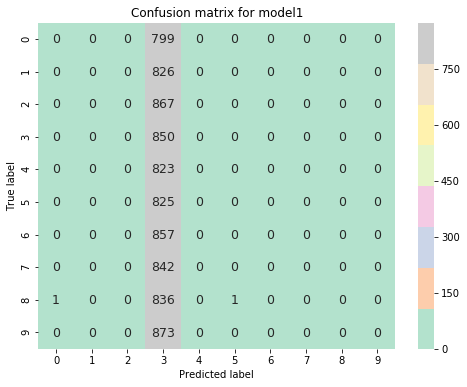

In [79]:
model1_val_cm = confusion_matrix(y_val.argmax(axis=1), y_pred_val_model1)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(model1_val_cm), annot=True, annot_kws={"fontsize":12.5}, cmap='Pastel2', fmt='d')
plt.title('Confusion matrix for model1')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Classification Report:**

In [80]:
print(classification_report(y_val.argmax(axis=1), y_pred_val_model1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       799
           1       0.00      0.00      0.00       826
           2       0.00      0.00      0.00       867
           3       0.10      1.00      0.18       850
           4       0.00      0.00      0.00       823
           5       0.00      0.00      0.00       825
           6       0.00      0.00      0.00       857
           7       0.00      0.00      0.00       842
           8       0.00      0.00      0.00       838
           9       0.00      0.00      0.00       873

    accuracy                           0.10      8400
   macro avg       0.01      0.10      0.02      8400
weighted avg       0.01      0.10      0.02      8400



- Almost all the numbers are classified as 3, which is visibly wrong. 
- Accuracy started to be stagnant, which might be due to the vanishing gradient effect.
- Let's normalize the data and then use SGD optimizer

## **Model2 - Implement batch normalization for training the neural network:**

In [100]:
# Initialize Sequential model
model2 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((img_rows*img_cols,),input_shape=input_shape))

# Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

# Hidden layers
model2.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model2.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))

# Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

#Compiling the Model
opt=tf.keras.optimizers.SGD(lr=0.001)

model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 230,206
Trainable params: 228,158
Non-trainable params: 2,048
_________________________________________________________________


**Fit the model:**

In [101]:
model2.fit(X_train_reshp, y_train, validation_data=(X_val_reshp, y_val), epochs=50,
          batch_size = 32)

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 6s 191us/sample - loss: 2.3132 - accuracy: 0.1430 - val_loss: 2.2024 - val_accuracy: 0.2030
Epoch 2/50
33600/33600 [==============================] - 6s 175us/sample - loss: 2.1396 - accuracy: 0.2451 - val_loss: 2.0482 - val_accuracy: 0.3062
Epoch 3/50
33600/33600 [==============================] - 6s 164us/sample - loss: 1.9858 - accuracy: 0.3421 - val_loss: 1.8821 - val_accuracy: 0.3957
Epoch 4/50
33600/33600 [==============================] - 6s 164us/sample - loss: 1.8216 - accuracy: 0.4249 - val_loss: 1.7099 - val_accuracy: 0.4782
Epoch 5/50
33600/33600 [==============================] - 6s 167us/sample - loss: 1.6725 - accuracy: 0.4911 - val_loss: 1.5643 - val_accuracy: 0.5462
Epoch 6/50
33600/33600 [==============================] - 5s 163us/sample - loss: 1.5433 - accuracy: 0.5371 - val_loss: 1.4371 - val_accuracy: 0.5854
Epoch 7/50
33600/33600 [===========================

**Accuracy & loss:**

In [102]:
model2_loss, model2_accuracy = model2.evaluate(X_val_reshp, y_val)
print("SGD neural network, RELU activations, normalized",(model2_accuracy*100))

8400/8400 [==============================] - 0s 55us/sample - loss: 0.6748 - accuracy: 0.8080
SGD neural network, RELU activations, normalized 80.79761862754822


**Predict for validation data:**

In [0]:
y_pred_val_model2 = model2.predict_classes(X_val_reshp)

**Build Confusion matrix:**

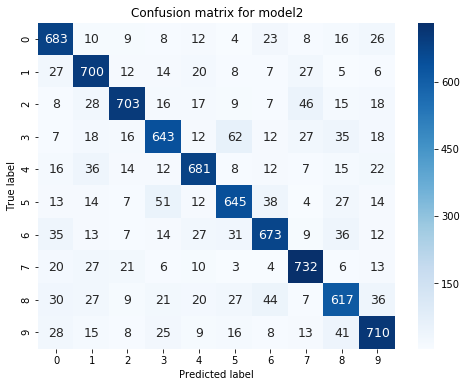

In [104]:
model2_val_cm = confusion_matrix(y_val.argmax(axis=1), y_pred_val_model2)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(model2_val_cm), annot=True, annot_kws={"fontsize":12.5}, cmap='Blues', fmt='d')
plt.title('Confusion matrix for model2')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Classification Report:**

In [105]:
print(classification_report(y_val.argmax(axis=1), y_pred_val_model2))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       799
           1       0.79      0.85      0.82       826
           2       0.87      0.81      0.84       867
           3       0.79      0.76      0.77       850
           4       0.83      0.83      0.83       823
           5       0.79      0.78      0.79       825
           6       0.81      0.79      0.80       857
           7       0.83      0.87      0.85       842
           8       0.76      0.74      0.75       838
           9       0.81      0.81      0.81       873

    accuracy                           0.81      8400
   macro avg       0.81      0.81      0.81      8400
weighted avg       0.81      0.81      0.81      8400



As seen, among all the 3 models, Model2 has performed better. So we will use Model2 to predict the test data

### **Model2 - On test data:**

**Accuracy & loss on test data:**

In [106]:
loss, accuracy = model2.evaluate(X_test_reshp, y_test)
print("Test accuracy",(accuracy*100))

18000/18000 [==============================] - 1s 61us/sample - loss: 0.6795 - accuracy: 0.8071
Test accuracy 80.70555329322815


**Predict on test data:**

In [0]:
y_pred_test_model2 = model2.predict_classes(X_test_reshp)

**Build Confusion matrix:**

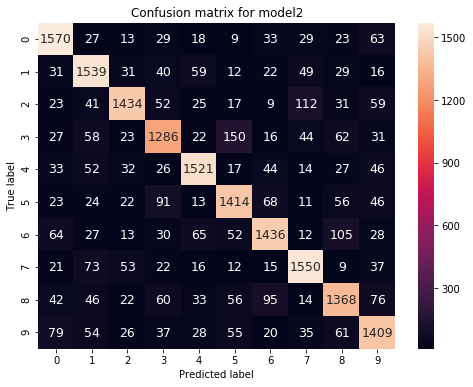

In [108]:
model2_test_cm = confusion_matrix(y_test.argmax(axis=1), y_pred_test_model2)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(model2_test_cm), annot=True, annot_kws={"fontsize":12.5}, cmap='rocket', fmt='d')
plt.title('Confusion matrix for model2')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Classification Report:**

In [109]:
print(classification_report(y_test.argmax(axis=1), y_pred_test_model2))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1814
           1       0.79      0.84      0.82      1828
           2       0.86      0.80      0.83      1803
           3       0.77      0.75      0.76      1719
           4       0.84      0.84      0.84      1812
           5       0.79      0.80      0.79      1768
           6       0.82      0.78      0.80      1832
           7       0.83      0.86      0.84      1808
           8       0.77      0.75      0.76      1812
           9       0.78      0.78      0.78      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



### **Populate accuracy dataframe for different models:**

In [0]:
# Model:
acc_df.iloc[1,0] = round(model_accuracy*100, 2)
acc_df.iloc[1,1] = 'Not Applicable'
acc_df.iloc[1,2] = 'Performance of Model'

# Model1:
acc_df.iloc[2,0] = round(model1_accuracy*100, 2)
acc_df.iloc[2,1] = 'Not Applicable'
acc_df.iloc[2,2] = 'Performance of Model1'

# Model2:
acc_df.iloc[3,0] = round(model2_accuracy*100, 2)
acc_df.iloc[3,1] = round(accuracy*100, 2)
acc_df.iloc[3,2] = 'Performance of Model2 is good compared to rest'

### **View acc_df:**

In [111]:
acc_df

,val_acc,test_acc,comments
KNN,36.17,36.09,Performance is poor
NN_model,60.81,Not Applicable,Performance of Model
NN_model1,10.12,Not Applicable,Performance of Model1
NN_model2,80.8,80.71,Performance of Model2 is good compared to rest


## **Comparison of Confusion matrix of all the models - On Validation data:**

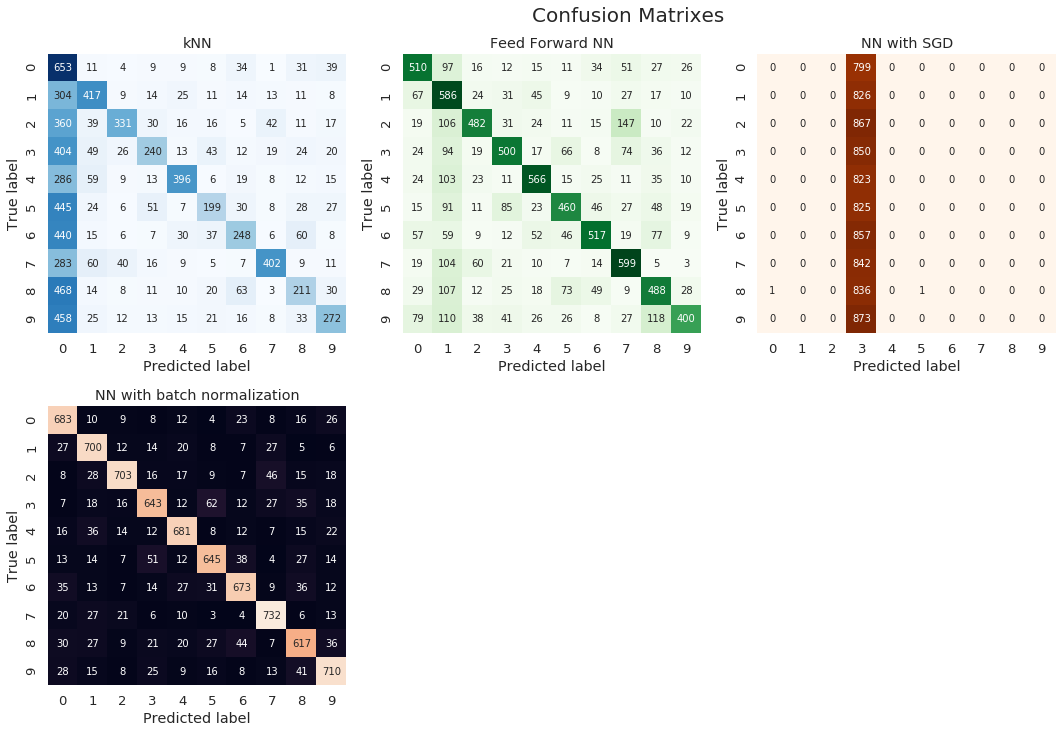

In [113]:
# Printing the confusion matrix of the above 4 models:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)

plt.suptitle("Confusion Matrixes", x=0.5, y=1.02, horizontalalignment='left', verticalalignment='top', fontsize = 20)

plt.subplot(2,3,1)
sns.heatmap(knn_val_cm, cbar=False, annot=True, annot_kws={"fontsize":10}, cmap="Blues", fmt="d")
plt.title("kNN")
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2,3,2)
sns.heatmap(model_val_cm, cbar=False, annot=True, annot_kws={"fontsize":10}, cmap="Greens", fmt="d")
plt.title("Feed Forward NN")
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2,3,3)
sns.heatmap(model1_val_cm, cbar=False, annot=True, annot_kws={"fontsize":10}, cmap="Oranges", fmt="d")
plt.title("NN with SGD")
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2,3,4)
sns.heatmap(model2_val_cm, cbar=False, annot=True, annot_kws={"fontsize":10}, cmap="rocket", fmt="d")
plt.title("NN with batch normalization")
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()

As seen, 

- kNN has done very poor job in classifying images
- A simple neural network with optimizer as adam and without normalization has predicted better compared to kNN with an accuracy of 60.81%
- Neural network with sgd optimizer and without normalization has the worst performance with an accuracy of 10.12%
- Neural network with sgd optimizer with batch normalization has done a pretty good job in classifying numbers from images with an accuracy of 80.8%

## **Inference from individual models:**

### **kNN:**

- Accuracy of 36.17% on validation data
- Not a good option for this particular image classification problem
- Many numbers are wrongly predicted as '0'

### **Feedforward Neural Network:**

- Accuracy of 60.81% on validation data
- Has done a decent job in classifying images
- Many numbers are wrongly predicted as '1' and hence the drop in accuracy

### **Neural Network with SGD and without normalization:**

- Accuracy of 10.12% on validation data
- Very poor performance with an epoch of 50
- Accuracy on the data became constant after few epochs
- Mostly all the numbers are wrongly predicted as '3'

### **Neural network with SGD and batch normalization:**

- Accuracy of 80.8% on validation data
- Has done a very good job in classifying numbers from images
- F1 score is also pretty good for all the target labels

# **Overall Summary:**

- kNN consumed a lot of time to get trained for this particular image processing problem and the accuracy was also not very good
- Optimizer tuning and normalization improves model accuracy in case of Neural networks
- Neural network did a very good job in this image processing problem

## <center> **End of SVHN - Neural Network project** </center>